# 1. 连续型变量的数据可视化

## 1.1 连续型的单变量特征数据可视化
1. 工具:matplotlib.pyplot的hist函数;seaborn的kde或者distplot函数
2. 作用:了解数据的分布情况,以及是否有奇异值

In [2]:
import numpy as np
import pandas as pd
from scipy import stats,integrate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord,"distributions")))

1. matplot.pyplot的hist函数
> 直观地让我们了解到**散落在各个区间的数据的情况(数据分布),hist默认为10个bins**

(array([ 4., 13., 12., 22., 20., 15.,  9.,  1.,  3.,  1.]),
 array([-1.85860798, -1.38515154, -0.91169511, -0.43823868,  0.03521775,
         0.50867418,  0.98213061,  1.45558704,  1.92904348,  2.40249991,
         2.87595634]),
 <a list of 10 Patch objects>)

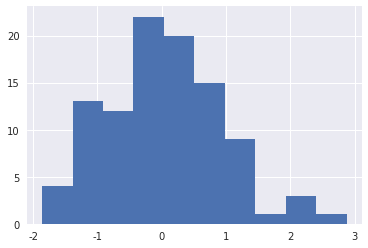

In [5]:
x = np.random.normal(size=100)
plt.hist(x)

2. sns的核密度估计曲线,kdeplot
> 查看数据的分布

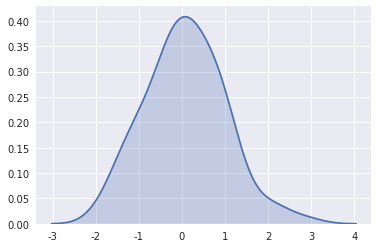

In [6]:
sns.kdeplot(x,shade=True)

3. sns的displot函数
> 1. 包含绝大多数变量的可视化能力,实现hist和kde的功能
> 2. kde参数,设置是否想看到kde
> 3. rug参数设置是否想看到直方图
> 4. 设置bins,用于观察后,对连续变量进行分箱

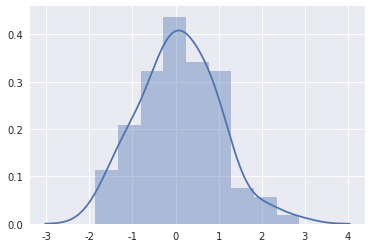

In [9]:
sns.distplot(x)

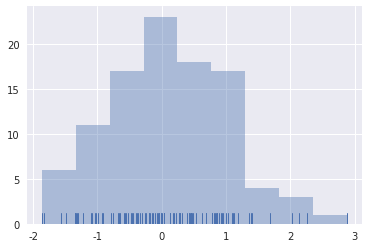

In [10]:
# 1.绘制kde一般比较耗时
sns.distplot(x,kde = False,rug=True)

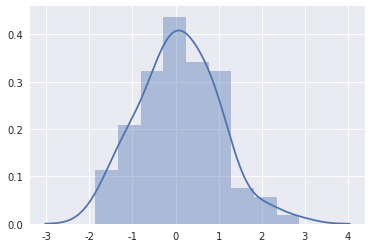

In [11]:
# 2.设置只显示kde
sns.distplot(x,rug=False,kde=True)

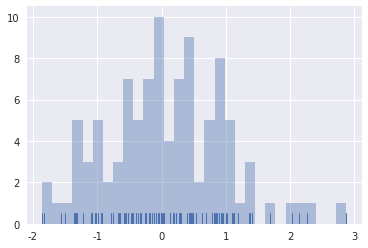

In [13]:
# 3. 设置bins
sns.distplot(x,bins=30,kde=False,rug=True)

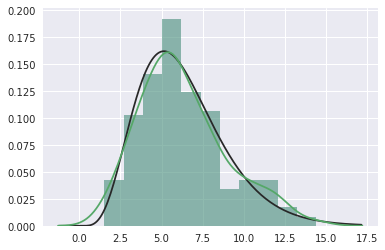

In [18]:
# 4.fit,近似拟合某种分布函数
x1 = np.random.gamma(6,size=200)
sns.distplot(x1,kde=False,fit=stats.gamma)
sns.distplot(x1,)

## 1.2 连续型的二元变量特征可视化
1. 工具:matplotlib.pyplot的scatterplot函数;seaborn的jointplot
2. 作用:查看两个连续型变量之间的关系

1. 使用多元高斯分布函数生成两个变量:x,y

In [19]:
mean,cov = [0,1],[(1,0.5),(0.5,1)]
data = np.random.multivariate_normal(mean,cov,200)
df = pd.DataFrame(data,columns=["x","y"])
df.head()

,x,y
0,-0.035434,2.095059
1,-1.025942,0.567045
2,0.029807,-0.504842
3,-0.469849,0.985867
4,-0.759971,0.572691


2. matplotlib.pyplot的Scatter函数
> 1. 二维看两个连续型变量关系的时候首选
> 2. 可以很容易发现数据的分布规律,比如是否有簇的存在

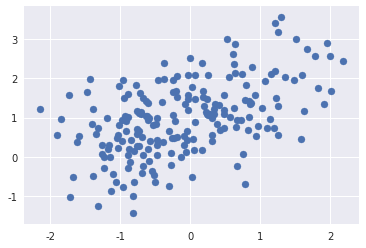

In [20]:
plt.scatter(df["x"].values,df["y"].values)

3. sns的jointplot函数,组合图，组合散点图和直方图/密度图等
> 1. 默认绘制散点图,加入直方图功能
> 2. kind = "hex",①六边形的散点,并给出相关系数和置信度;②直方图
> 3. kind = "kde",①中间热度图和相关系数和置信度;②kde图

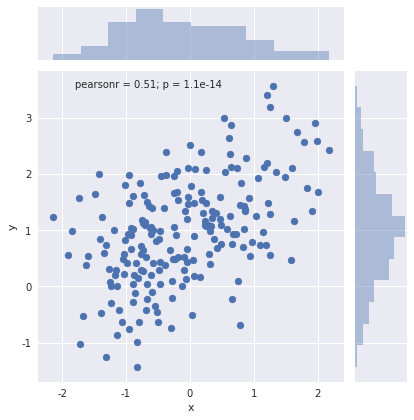

In [21]:
sns.jointplot(x="x",y="y",data=df)

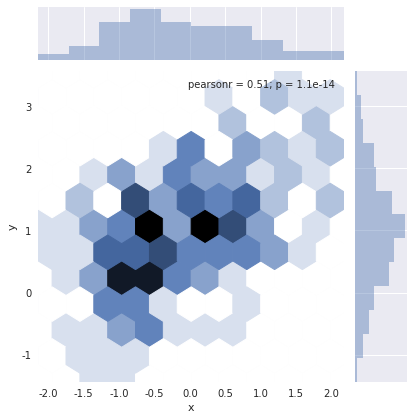

In [22]:
# kind ="hex"
sns.jointplot(x="x",y="y",data=df,kind="hex")

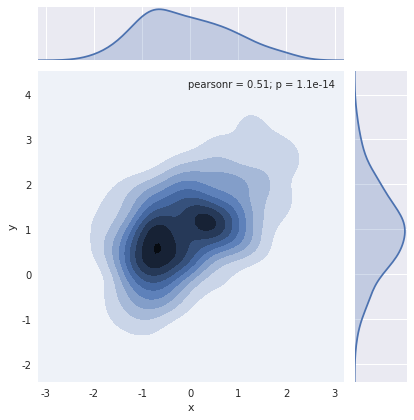

In [23]:
# kind = "kde"
sns.jointplot(x="x",y="y",data=df,kind="kde")

4. sns的plot_joint函数,比较酷炫，先画图后组合
> 1. 将很多绘图形式放在同一张图表中

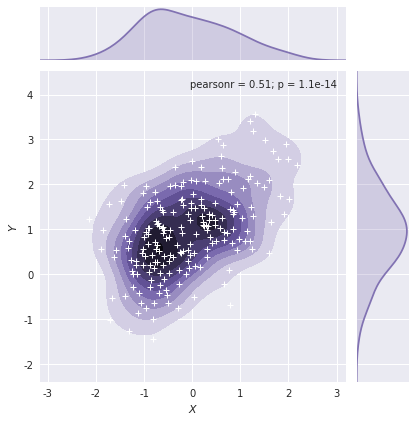

In [30]:
g = sns.jointplot(x="x",y="y",data=df,kind="kde",color="m")
g.plot_joint(plt.scatter,c="w",s=30,linewidth=1,marker="+") #将散点图的点表示为＂＋＂
ｇ.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$","$Y$")

５．sns的pairplot,成双图
> 1. 可以同时绘制多个双变量之间的关系，不过非常耗时，而且密集，不建议使用

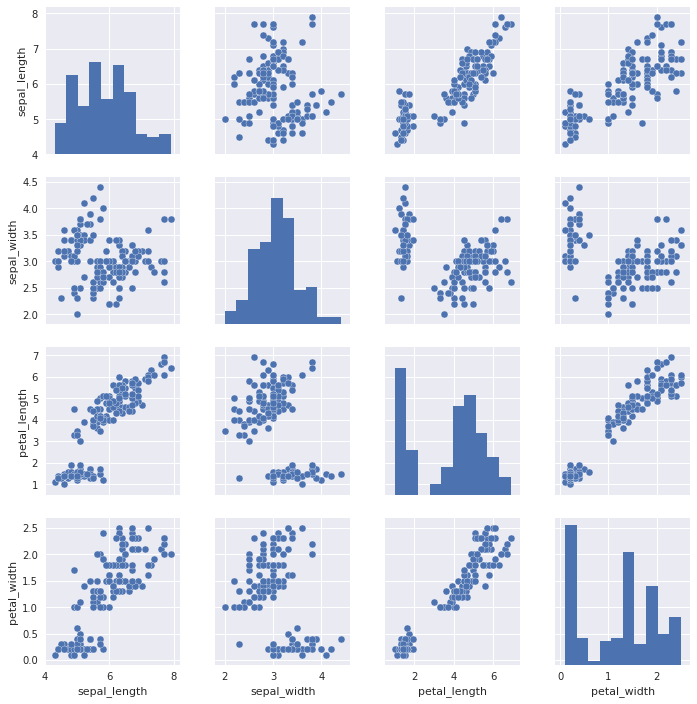

In [31]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

６．连续型变量之间特征组合的方式之一，对于聚类结果，进行one-hot编码

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


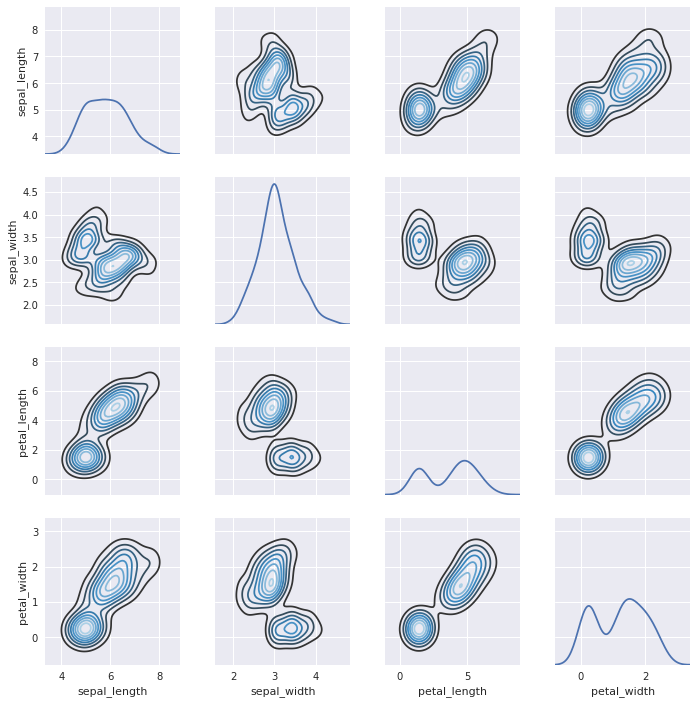

In [37]:
g = sns.PairGrid(iris) #先画出空白的特征个数＊特征个数的画布
g.map_diag(sns.kdeplot) #画出主对角线的kde图
g.map_offdiag(sns.kdeplot,cmap="Blues_d",n_levels=8)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


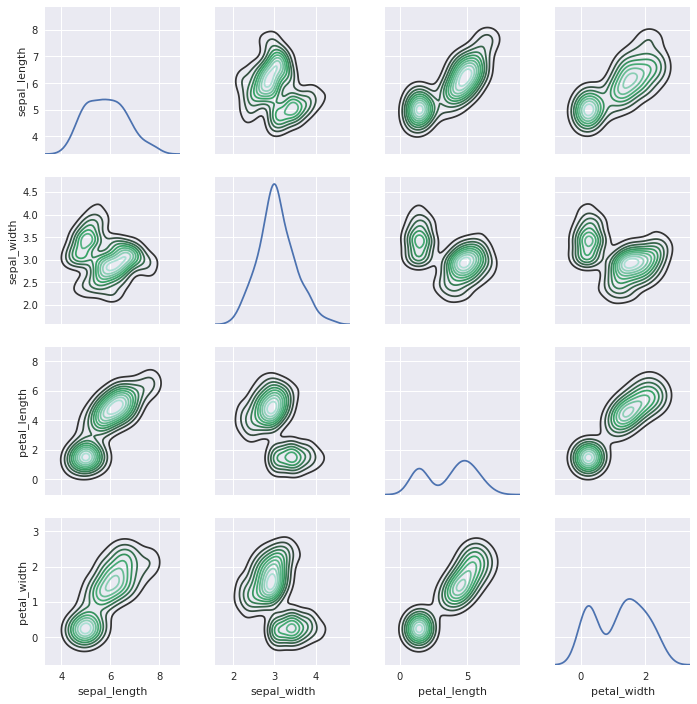

In [38]:
ｇ = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)